In [1]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.5 MB/s eta 0:00:00


In [2]:
# import Python packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# import dataset
queens = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_queens.xlsx")
brooklyn = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_brooklyn.xlsx")
manhattan = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_manhattan.xlsx")
bronx = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_bronx.xlsx")
statenisland = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_statenisland.xlsx")

all_data = pd.concat([queens, brooklyn, manhattan, bronx, statenisland])
all_data.describe()

/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_queens.xlsx
/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_statenisland.xlsx
/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_bronx.xlsx
/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_brooklyn.xlsx
/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_manhattan.xlsx


,BOROUGH,BLOCK,LOT,EASEMENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,98270.000000,98270.000000,98270.000000,0.0,98268.000000,74209.000000,55050.000000,77365.000000,5.189400e+04,5.189400e+04,90962.000000,98270.00000,9.827000e+04
mean,2.931668,4074.654116,407.336837,NaN,10838.035800,3.034605,0.342343,3.154411,6.000338e+03,5.901244e+03,1953.229810,1.66130,1.573321e+06
std,1.301492,3536.717583,671.622219,NaN,568.321101,21.624886,10.410163,22.955828,9.983351e+04,4.415590e+04,36.261037,0.78476,1.133458e+07
min,1.000000,1.000000,1.000000,NaN,10001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1800.000000,1.00000,0.000000e+00
25%,2.000000,1216.250000,23.000000,NaN,10303.000000,1.000000,0.000000,1.000000,2.000000e+03,1.368000e+03,1925.000000,1.00000,0.000000e+00
50%,3.000000,3060.000000,53.000000,NaN,11208.000000,1.000000,0.000000,1.000000,2.500000e+03,1.962500e+03,1950.000000,2.00000,6.109500e+05
75%,4.000000,6099.000000,1007.000000,NaN,11355.000000,2.000000,0.000000,2.000000,4.000000e+03,2.851750e+03,1980.000000,2.00000,1.100000e+06
max,5.000000,16350.000000,9114.000000,NaN,11697.000000,800.000000,2261.000000,2261.000000,5.799632e+06,2.400000e+06,2022.000000,4.00000,1.033000e+09


In [3]:
# data cleaning for all_data
all_data.head()
all_data.info()
all_data.describe()

# According to all_data.info(), the following columns have NaN:
# TAX CLASS AT PRESENT
# EASEMENT (all values are missing, will not be using this column)
# BUILDING CLASS AT PRESENT 
# APARTMENT NUMBER
# ZIP CODE
# RESIDENTIAL UNITS
# COMMERCIAL UNITS
# TOTAL UNITS
# LAND SQUARE FEET
# GROSS SQUARE FEET
# YEAR BUILT

# According to all_data.describe(), the following columns have values equal to 0 which they should not have:
# Land square feet
# Gross square feet
# Sale price

# drop column EASEMENT and rows with NaN
# too many NULL value for APARTMENT NUMBER, dropping this column
all_data.dropna(subset = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE'], inplace = True)
all_data = all_data.drop(columns = ['EASEMENT', 'COMMERCIAL UNITS', 'APARTMENT NUMBER'])

# in this case, the target property is residential properties
# thus, according to the glossary for TAX CLASS AT TIME OF SALE
# dropping rows with TAX CLASS AT TIME OF SALE = 3 or 4
# dropping column COMMERCIAL UNITS
all_data = all_data.loc[(all_data['TAX CLASS AT TIME OF SALE'] == 1) | (all_data['TAX CLASS AT TIME OF SALE'] == 2)]
all_data.head()

# # drop unreasonable data
# # drop rows with LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, or SALE PRICE equals to 0
# all_data = all_data.loc[~((all_data['LAND SQUARE FEET'] == 0) | (all_data['GROSS SQUARE FEET'] == 0) | (all_data['YEAR BUILT'] == 0) | (all_data['SALE PRICE'] == 0))]

all_data.describe()

# split all_data into training and testing datasets for linear regression
training_data, testing_data = train_test_split(all_data, test_size = 0.2, random_state = 25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98270 entries, 0 to 9087
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         98270 non-null  int64         
 1   NEIGHBORHOOD                    98270 non-null  object        
 2   BUILDING CLASS CATEGORY         98270 non-null  object        
 3   TAX CLASS AT PRESENT            98210 non-null  object        
 4   BLOCK                           98270 non-null  int64         
 5   LOT                             98270 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       98210 non-null  object        
 8   ADDRESS                         98270 non-null  object        
 9   APARTMENT NUMBER                25280 non-null  object        
 10  ZIP CODE                        98268 non-null  float64       
 11  RES

In [4]:
# Step 1: understand the dataset

# shape of the training dataset and teh testing dataset
# training_data
# testing_data

# # understand the nature of teh training data
# training_data.info()
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37816 entries, 17931 to 20964
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         37816 non-null  int64         
 1   NEIGHBORHOOD                    37816 non-null  object        
 2   BUILDING CLASS CATEGORY         37816 non-null  object        
 3   TAX CLASS AT PRESENT            37816 non-null  object        
 4   BLOCK                           37816 non-null  int64         
 5   LOT                             37816 non-null  int64         
 6   BUILDING CLASS AT PRESENT       37816 non-null  object        
 7   ADDRESS                         37816 non-null  object        
 8   ZIP CODE                        37816 non-null  float64       
 9   RESIDENTIAL UNITS               37816 non-null  float64       
 10  TOTAL UNITS                     37816 non-null  float64       
 11

In [5]:
# The following variables may need feature engineering:
# NEIGHBORHOOD
# BUILDING CLASS CATEGORY
# ADDRESS
# ZIP CODE

# After reading the glossary of terms, I decided to include the following columns for now:
# BOROUGH OR BLOCK OR LOT OR ZIP CODE OR NEIGHBORHOOD
# BUILDING CLASS AT TIME OF SALE
# TAX CLASS AT TIME OF SALE
# RESIDENTIAL UNITS
# COMMERCIAL UNITS
# TOTAL UNITS (Maybe)
# LAND SQUARE FEET
# GROSS SQUARE FEET
# YEAR BUILT (need feature engineering)

# drop rows with LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, or SALE PRICE equals to 0
training_data = training_data.loc[(training_data['LAND SQUARE FEET'] > 0) & (training_data['GROSS SQUARE FEET'] > 0) & (training_data['YEAR BUILT'] > 0)]

# drop rows with LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT
training_data.describe()

# training_data.describe().columns
df_num = training_data[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'RESIDENTIAL UNITS', 'TOTAL UNITS']]
df_cat = training_data[['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'TOTAL UNITS', 'YEAR BUILT']]

                   LAND SQUARE FEET  GROSS SQUARE FEET  RESIDENTIAL UNITS  \
LAND SQUARE FEET           1.000000           0.434825           0.430717   
GROSS SQUARE FEET          0.434825           1.000000           0.977459   
RESIDENTIAL UNITS          0.430717           0.977459           1.000000   
TOTAL UNITS                0.431599           0.978102           0.999885   

                   TOTAL UNITS  
LAND SQUARE FEET      0.431599  
GROSS SQUARE FEET     0.978102  
RESIDENTIAL UNITS     0.999885  
TOTAL UNITS           1.000000  


<AxesSubplot:>

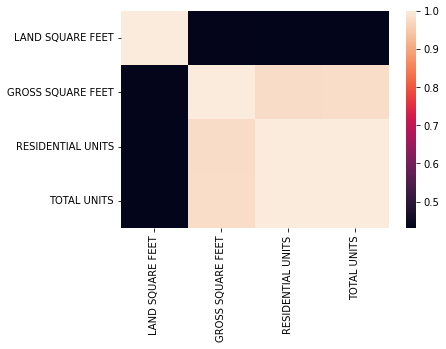

In [6]:
# use heatmap to see if any numerical variables are highly correlated
print(df_num.corr())
sns.heatmap(df_num.corr())

In [7]:
# it shows that TOTAL UNITS, RESIDENTIAL UNITS, GROSS SQUARE FEET are highly corelated
# so TOTAL UNITS and GROSS SQUARE FEET will not be included in the model
df_num = df_num.drop(columns = ['TOTAL UNITS', 'GROSS SQUARE FEET'])

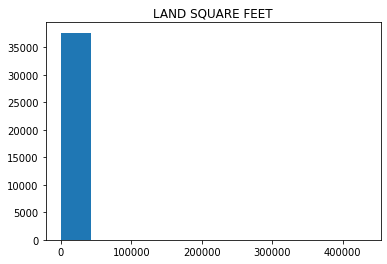

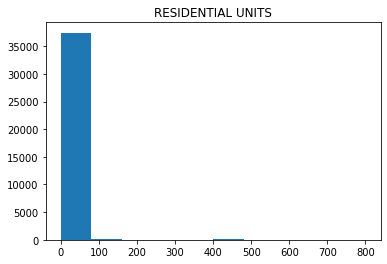

In [8]:
# plot the distribution of the numeric variables
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [9]:
# need to exclude outliers 
# in this case, outlier is defined as any value that is outside of the outter fence (Q3 + 3 * IQR)
# for LAND SQUARE FEET: 4000 + (3 * 2000) = 10000
# for GROSS SQUARE FEET: 2914 + (3 * 1474) = 7336
# for RESIDENTIAL UNITS: < 10
# for COMMERCIAL UNITS: < 8
training_data = training_data.loc[(training_data['LAND SQUARE FEET'] < 10000) & (training_data['RESIDENTIAL UNITS'] < 10)]
training_data['RESIDENTIAL UNITS'].unique()

array([3., 1., 2., 4., 6., 9., 5., 8., 7.])

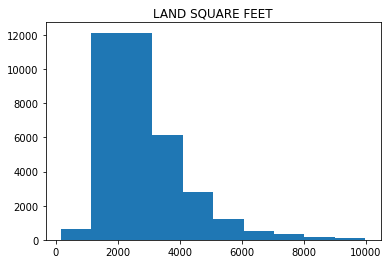

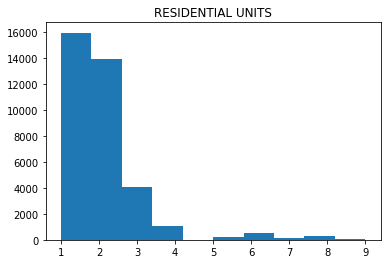

In [10]:
df_num = training_data[['LAND SQUARE FEET', 'RESIDENTIAL UNITS']]
# df_cat = training_data[['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT']]
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [11]:
# LAND SQUARE FEET, GROSS SQUARE FEET, RESIDENTIAL UNITS, COMMERCIAL UNITS are right skewed
# use log transformation to normalize them
training_data['LAND SQUARE FEET'] = np.log(training_data['LAND SQUARE FEET'])
# training_data['GROSS SQUARE FEET'] = np.log(training_data['GROSS SQUARE FEET'])
training_data['RESIDENTIAL UNITS'] = np.log(training_data['RESIDENTIAL UNITS'].add(1))
# training_data['COMMERCIAL UNITS'] = np.log(training_data['COMMERCIAL UNITS'].add(1))

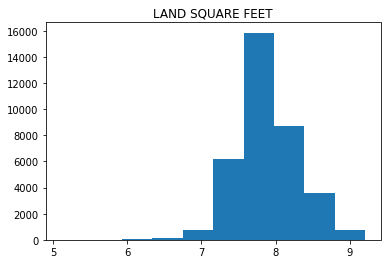

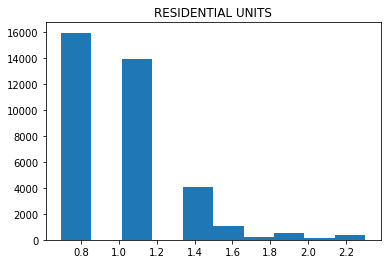

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
17931,4,LONG ISLAND CITY,03 THREE FAMILY DWELLINGS,1,606,117,C0,35-17 33 STREET,11106.0,1.386294,3.0,7.573531,2813.0,2001.0,1,C0,0,2021-07-30
20010,3,MARINE PARK,01 ONE FAMILY DWELLINGS,1,8557,56,A1,2226 COLEMAN STREET,11234.0,0.693147,1.0,7.638680,924.0,1920.0,1,A1,800000,2021-08-05
19425,4,MASPETH,02 TWO FAMILY DWELLINGS,1,2762,98,B1,6301 ELIOT AVE,11379.0,1.098612,2.0,7.600902,2080.0,1930.0,1,B1,0,2021-11-06
25210,4,SO. JAMAICA-BAISLEY PARK,01 ONE FAMILY DWELLINGS,1,12208,50,A9,118-30 154TH STREET,11434.0,0.693147,1.0,7.207860,786.0,1925.0,1,A9,500000,2021-07-09
5413,4,EAST ELMHURST,01 ONE FAMILY DWELLINGS,1,1637,49,A5,23-41 100TH STREET,11369.0,0.693147,1.0,7.840706,1104.0,1950.0,1,A5,530000,2021-10-04


In [12]:
df_num = training_data[['LAND SQUARE FEET', 'RESIDENTIAL UNITS']]
df_cat = training_data[['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'YEAR BUILT']]
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()
training_data.head()

                            BOROUGH     BLOCK       LOT  ZIP CODE  \
BOROUGH                    1.000000  0.119429 -0.000418  0.004428   
BLOCK                      0.119429  1.000000  0.027659  0.452184   
LOT                       -0.000418  0.027659  1.000000 -0.104607   
ZIP CODE                   0.004428  0.452184 -0.104607  1.000000   
TAX CLASS AT TIME OF SALE -0.192983 -0.191304 -0.043803 -0.022566   
YEAR BUILT                 0.335580  0.088693  0.100825 -0.250581   

                           TAX CLASS AT TIME OF SALE  YEAR BUILT  
BOROUGH                                    -0.192983    0.335580  
BLOCK                                      -0.191304    0.088693  
LOT                                        -0.043803    0.100825  
ZIP CODE                                   -0.022566   -0.250581  
TAX CLASS AT TIME OF SALE                   1.000000   -0.109861  
YEAR BUILT                                 -0.109861    1.000000  


<AxesSubplot:>

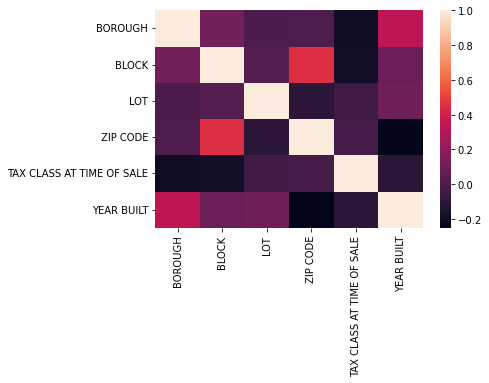

In [13]:
# for categorical variable
print(df_cat.corr())
sns.heatmap(df_cat.corr())

In [14]:
# choosing variables to include: BOROUGH, NEIGHBORHOOD, BLOCK, LOT, ZIP CODE
len(df_cat['NEIGHBORHOOD'].unique()) # 240
len(df_cat['BLOCK'].unique()) # 10632
len(df_cat['LOT'].unique()) # 716
len(df_cat['ZIP CODE'].unique()) # 172

172

In [15]:
# drop the outlier for RESIDENTIAL UNITS and COMMERCIAL UNITS
# training_data = training_data.loc[training_data['COMMERCIAL UNITS'] < 16]
# df_cat = training_data[['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT', 'SALE PRICE']]


# df_residential_mean = df_cat.groupby(['RESIDENTIAL UNITS']).agg({'SALE PRICE': 'mean'})
# plt.bar(df_residential_mean.index, df_residential_mean['SALE PRICE'])
# plt.title('RESIDENTIAL UNITS VS AVG SALE PRICE')
# plt.show()

# df_commercial_mean = df_cat.groupby(['COMMERCIAL UNITS']).agg({'SALE PRICE': 'mean'})
# plt.bar(df_commercial_mean.index, df_commercial_mean['SALE PRICE'])
# plt.title('COMMERCIAL UNITS VS AVG SALE PRICE')
# plt.show()


In [16]:
# # data cleansing for three numerical variables
# # drop rows where LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT or SALE PRICE is 0
# training_data_drop_0 = training_data.loc[~((training_data['LAND SQUARE FEET'] == 0) | (training_data['GROSS SQUARE FEET'] == 0) | (training_data['YEAR BUILT'] == 0) | (training_data['SALE PRICE'] == 0))]
# training_data_drop_0.describe()

# # NEXT STEP: research about the smallest habitable space; drop outliers
# # identifying values that are outside of the outter fence(Q3 + 3*IQ) to be outliers
# # outter_fence_land = 2800 + 3*()
# # lower_fence_price = 340000 - 1.5 * (730000 - 340000)

# # after researching about the smallest habitable space and the smallest apartment in NYC
# # I decided to drop rows with LAND SQUARE FEET < 60 or GROSS SQUARE FEET < 60
# # in addition, since this dataset includes data from 2003 to 2019, I looked up the 
# training_data_clean = training_data_drop_0.loc[(training_data_drop_0['LAND SQUARE FEET'] >= 60) & (training_data_drop_0['GROSS SQUARE FEET'] >= 60)]
# training_data_clean.describe()

# training_data_clean.sort_values('SALE PRICE').head(20000)
